# Assignment 1


Wine Quality Classification using KNN
Use the winequality.csv dataset for this first assignment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.simplefilter("ignore")


In [2]:
# Load the data from the file winequality.csv. (2)
df = pd.read_csv("Winequality.csv")
print(df.head())
print(df.isnull().sum()) 
# No null values, no need for data wrangling for null values

   Fixed acidity  Volatile Acidity  Citric Acid  Residual Sugar  Chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   Free Sulfur Dioxide  Total Sulfur Dioxide  Density    pH  Sulphates  \
0                   11                    34   0.9978  3.51       0.56   
1                   25                    67   0.9968  3.20       0.68   
2                   15                    54   0.9970  3.26       0.65   
3                   17                    60   0.9980  3.16       0.58   
4                   11                    34   0.9978  3.51       0.56   

   Alcohol  Quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
# extracting descriptive features
df_desc  = df.iloc[:,:-1]
print(df_desc)
# extracting target feature
target_feature  = df.iloc[:,-1:]
print(target_feature)

      Fixed acidity  Volatile Acidity  Citric Acid  Residual Sugar  Chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      Free Sulfur Dioxide  

In [4]:
# Standardize all variables other than Quality. (2)
norm = Normalizer()
descriptive_features = pd.DataFrame(norm.fit_transform(df_desc), columns=df_desc.columns)
descriptive_features

,Fixed acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol
0,0.195153,0.018460,0.000000,0.050107,0.002004,0.290092,0.896647,0.026314,0.092566,0.014768,0.247896
1,0.107241,0.012099,0.000000,0.035747,0.001347,0.343722,0.921175,0.013705,0.043996,0.009349,0.134739
2,0.135457,0.013198,0.000695,0.039942,0.001598,0.260494,0.937777,0.017314,0.056614,0.011288,0.170189
3,0.174367,0.004359,0.008718,0.029580,0.001168,0.264664,0.934108,0.015537,0.049196,0.009030,0.152571
4,0.195153,0.018460,0.000000,0.050107,0.002004,0.290092,0.896647,0.026314,0.092566,0.014768,0.247896
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.110886,0.010731,0.001431,0.035770,0.001610,0.572315,0.786933,0.017794,0.061703,0.010373,0.187791
1595,0.089960,0.008386,0.001525,0.033544,0.000945,0.594650,0.777619,0.015173,0.053671,0.011588,0.170771
1596,0.123069,0.009963,0.002540,0.044930,0.001485,0.566506,0.781388,0.019451,0.066809,0.014651,0.214882
1597,0.105669,0.011552,0.002149,0.035820,0.001343,0.573119,0.788039,0.017829,0.063939,0.012716,0.182682


In [5]:
#Partition the dataset:
	#•	random_state = 42 (1)
	#•	Partitions 60/20/20 (1)
	#•	Make sure to stratify! (1)
x, x_test, y, y_test = train_test_split(descriptive_features,target_feature,test_size=0.2,train_size=0.8,random_state=42,stratify=target_feature)
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.25,train_size =0.75,random_state=42,stratify=y)

In [6]:
#print(x_train.shape,x_test.shape,x_cv.shape)

In [7]:
#Iterate on K ranging from 1 to 30.
#	•	Build a KNN classification model to predict Quality based on all the remaining numeric variables. (2)
#	•	Plot the accuracy for both the Training and Validation datasets. (4)

# Training set

range = range(1, 31)
score = []
# looping through 1 - 30
for k in range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    score.append(metrics.accuracy_score(y_test, y_pred))
print(score)

[0.565625, 0.509375, 0.4875, 0.49375, 0.534375, 0.5, 0.5125, 0.490625, 0.515625, 0.509375, 0.51875, 0.50625, 0.50625, 0.490625, 0.5, 0.48125, 0.503125, 0.48125, 0.48125, 0.4875, 0.48125, 0.465625, 0.478125, 0.4625, 0.49375, 0.490625, 0.49375, 0.49375, 0.5, 0.50625]


Text(0, 0.5, 'Accuracy of Testing')

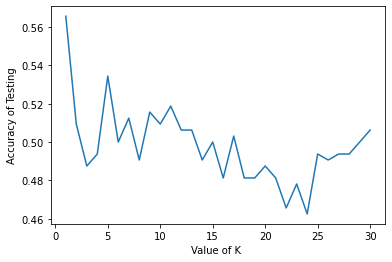

In [8]:
# plot the relationship between K and testing accuracy

plt.plot(range, score)
plt.xlabel('Value of K ')
plt.ylabel('Accuracy of Testing')

In [9]:
# Validation set
del range
range = range(1, 31)
score2 = []
# looping through 1 - 30
for k in range:
    knn2 = KNeighborsClassifier(n_neighbors=k)
    knn2.fit(x_cv, y_cv)
    y_pred2 = knn2.predict(x_test)
    score2.append(metrics.accuracy_score(y_test, y_pred2))
print(score2)

[0.50625, 0.5, 0.4375, 0.471875, 0.4625, 0.465625, 0.45625, 0.4625, 0.475, 0.490625, 0.490625, 0.48125, 0.490625, 0.490625, 0.490625, 0.51875, 0.496875, 0.49375, 0.50625, 0.49375, 0.5125, 0.48125, 0.509375, 0.515625, 0.496875, 0.515625, 0.49375, 0.4875, 0.4875, 0.4875]


Text(0, 0.5, 'Accuracy Testing')

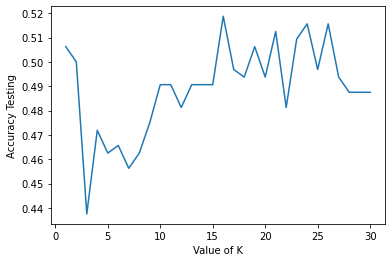

In [10]:
# plot the relationship between K and testing accuracy

plt.plot(range, score2)
plt.xlabel('Value of K')
plt.ylabel('Accuracy Testing')


In [11]:
# Which value of k produced the best accuracy in the Training and Validation data sets? (2)
# Getting max value of score in training set
max_value = max(score)
max_index = score.index(max_value) +1
print("Best value of k for Training set:",max_index)

# Getting max value of score in validation set
max_value2 = max(score2)
max_index2 = score2.index(max_value2) +1
print("Best value of k for Validation set:",max_index2)

Best value of k for Training set: 1
Best value of k for Validation set: 16


In [12]:
# Generate predictions for the test partition with the chosen value of k. 
# Plot the confusion matrix of the actual vs predicted wine quality. (4)

knn3 = KNeighborsClassifier(n_neighbors=1)
knn3.fit(x_train, y_train)
y_pred3 = knn3.predict(x_test)
score3 = metrics.accuracy_score(y_test, y_pred3)
#score3


In [13]:
df.Quality.unique()

array([5, 6, 7, 4, 8, 3])

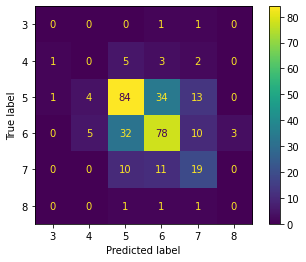

In [14]:

#Generate predictions for the test partition with the chosen value of k. 
#Plot the confusion matrix of the actual vs predicted wine quality. (4)
cm = confusion_matrix(y_test, y_pred3)
cmd = ConfusionMatrixDisplay(cm, display_labels=['3','4','5','6','7','8'])
print(cmd.plot())

In [15]:
acc_score = accuracy_score(y_test, y_pred3)
print('accuracy of model on the test dataset is : ', acc_score *100 ) 

accuracy of model on the test dataset is :  56.56250000000001


In [16]:
y_test

,Quality
963,6
475,5
1,5
329,5
149,6
...,...
1173,6
827,5
356,5
1287,5


In [17]:
y_test['Predicted Quality'] = y_pred3

In [18]:
y_test

,Quality,Predicted Quality
963,6,6
475,5,6
1,5,5
329,5,6
149,6,6
...,...,...
1173,6,6
827,5,5
356,5,5
1287,5,6


In [19]:
del range
ks2 = range(1, 31)
score2 = []
# looping through 1 - 30
for k2 in ks2:
    knn2 = KNeighborsClassifier(n_neighbors=k2)
    knn2.fit(x_cv, y_cv)
    y_pred2 = knn2.predict(x_test)
score2.append(metrics.accuracy_score(y_test, y_pred2))
print(score2)
# plot the relationship between K and testing accuracy
plt.plot(ks2, score2)
plt.set_xlabel('Value of K')
plt.set_ylabel('Accuracy Testing')


ValueError: Classification metrics can't handle a mix of multiclass-multioutput and binary targets

In [8]:
ks2

NameError: name 'ks2' is not defined

   Fixed acidity  Volatile Acidity  Citric Acid  Residual Sugar  Chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   Free Sulfur Dioxide  Total Sulfur Dioxide  Density    pH  Sulphates  \
0                   11                    34   0.9978  3.51       0.56   
1                   25                    67   0.9968  3.20       0.68   
2                   15                    54   0.9970  3.26       0.65   
3                   17                    60   0.9980  3.16       0.58   
4                   11                    34   0.9978  3.51       0.56   

   Alcohol  Quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

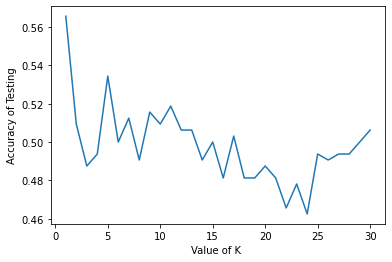

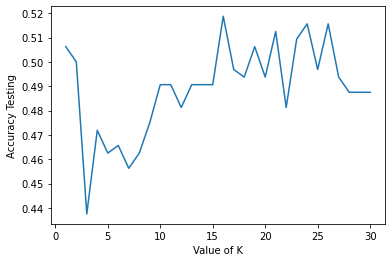

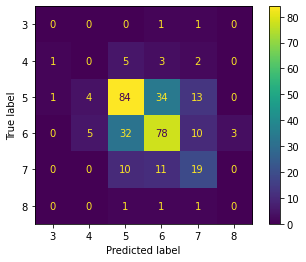

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.simplefilter("ignore")


# FIRST PART
# CODE WILL NOT RUN. THIS IS JUST FOR REFERENCE

def main():
    # Load the data from the file winequality.csv. (2)
    df = pd.read_csv("Winequality.csv")
    print(df.head())
    print(df.isnull().sum()) 
    # No null values, no need for data wrangling for null values
    # extracting descriptive features
    df_desc  = df.iloc[:,:-1]
    print(df_desc.head())
    # extracting target feature
    target_feature  = df.iloc[:,-1:]
    print(target_feature.head())
    # Standardize all variables other than Quality. (2)
    norm = Normalizer()
    descriptive_features = pd.DataFrame(norm.fit_transform(df_desc), columns=df_desc.columns)
    descriptive_features.head()
    #Partition the dataset:
	    #•	random_state = 42 (1)
	    #•	Partitions 60/20/20 (1)
	    #•	Make sure to stratify! (1)
    x, x_test, y, y_test = train_test_split(descriptive_features,target_feature,test_size=0.2,train_size=0.8,random_state=42,stratify=target_feature)
    x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.25,train_size =0.75,random_state=42,stratify=y)
    #print(x_train.shape,x_test.shape,x_cv.shape)
    #Iterate on K ranging from 1 to 30.
    #	•	Build a KNN classification model to predict Quality based on all the remaining numeric variables. (2)
    #	•	Plot the accuracy for both the Training and Validation datasets. (4)


    # Training set
    ks = list(np.arange(1,30+1))
    score = []
    # looping through 1 - 30
    for k in ks:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        score.append(metrics.accuracy_score(y_test, y_pred))
    print(score)
    # plot the relationship between K and testing accuracy
    plt.figure(1)
    plt.plot(ks, score)
    plt.xlabel('Value of K ')
    plt.ylabel('Accuracy of Testing')

    # Validation set
    ks2 = ks
    score2 = []
    # looping through 1 - 30
    for k2 in ks2:
        knn2 = KNeighborsClassifier(n_neighbors=k2)
        knn2.fit(x_cv, y_cv)
        y_pred2 = knn2.predict(x_test)
        score2.append(metrics.accuracy_score(y_test, y_pred2))
    print('printing score 2 ',score2)
    # plot the relationship between K and testing accuracy
    
    plt.figure(2)
    plt.plot(ks2, score2)
    plt.xlabel('Value of K')
    plt.ylabel('Accuracy Testing')

    # Which value of k produced the best accuracy in the Training and Validation data sets? (2)
    # Getting max value of score in training set
    max_value = max(score)
    max_index = score.index(max_value) +1
    print("Best value of k for Training set:",max_index)

    # Getting max value of score in validation set
    max_value2 = max(score2)
    max_index2 = score2.index(max_value2) +1
    print("Best value of k for Validation set:",max_index2)
    # Generate predictions for the test partition with the chosen value of k. 
    # Plot the confusion matrix of the actual vs predicted wine quality. (4)

    knn3 = KNeighborsClassifier(n_neighbors=1)
    knn3.fit(x_train, y_train)
    y_pred3 = knn3.predict(x_test)
    score3 = metrics.accuracy_score(y_test, y_pred3)
    #score3

    # df.Quality.unique()

    #Generate predictions for the test partition with the chosen value of k. 
    #Plot the confusion matrix of the actual vs predicted wine quality. (4)
    cm = confusion_matrix(y_test, y_pred3)
    cmd = ConfusionMatrixDisplay(cm, display_labels=['3','4','5','6','7','8'])
    print(cmd.plot())
    acc_score = accuracy_score(y_test, y_pred3)
    print('accuracy of model on the test dataset is : ', acc_score *100 )
    y_test['Predicted Quality'] = y_pred3 
    print(y_test.head())


if __name__ == '__main__':
    main()
